# Part 4: Feature Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsembleClassifier


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

In [2]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split Input and Traget Variables

In [3]:
X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

In [4]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (569, 31)
Shape of training dataset: (426, 30)
Shape of testing dataset: (143, 30)


## Defining all the functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [6]:
def model_comparison(models =[], model_names= []):
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [7]:
def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", round(rec, 4))
    
    print ('.')

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", round(rec_mac, 4))

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", round(rec_wei, 4))

#### Writing a function returns Macro and Weighted average of Recall Score, Precision, and F1 Score

In [8]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)

#### ROC_AUC, Precision Recall AUC and the Confusion Matrices

In [9]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

## (a) Feature selection using SelectFromModel and LassoCV

In [10]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

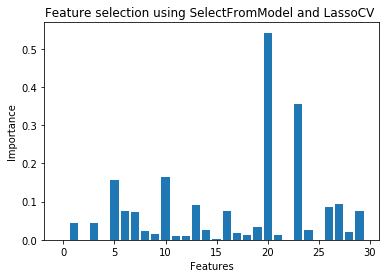

Selected features: ['radius_worst' 'area_worst' 'radius_se' 'compactness_mean'
 'concave points_worst' 'area_se' 'concavity_worst'
 'fractal_dimension_worst' 'concavity_mean' 'concavity_se'
 'concave points_mean' 'texture_mean' 'area_mean' 'fractal_dimension_se'
 'smoothness_se']


In [11]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

clf = LassoCV(random_state=42).fit(X_train, y_train)
importance = np.abs(clf.coef_)

idx_features = (-importance).argsort()[:15]
name_features = np.array(X.columns.to_list())[idx_features]

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Feature selection using SelectFromModel and LassoCV ")
plt.show()

print('Selected features: {}'.format(name_features))

In [12]:
df = pd.read_csv('preprocessed_breast_cancer.csv', usecols = ['radius_worst', 'area_worst', 'radius_se', 'compactness_mean',
 'concave points_worst', 'area_se', 'concavity_worst',
 'fractal_dimension_worst', 'concavity_mean', 'concavity_se',
 'concave points_mean', 'texture_mean', 'area_mean', 'fractal_dimension_se',
 'smoothness_se', 'diagnosis'])

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
models = [AdaBoostClassifier(random_state = 42)]
model_names=['AdaBoostClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,AdaBoostClassifier,0.98501,0.997827,0.981132,0.981132,1.0,0.981132,0.986014


---------------------------------------------------------------


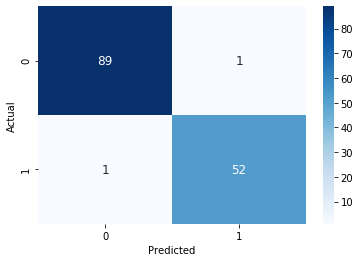

TP: 52, FP: 1, TN: 89, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.989     0.989     0.989        90
           1      0.981     0.981     0.981        53

    accuracy                          0.986       143
   macro avg      0.985     0.985     0.985       143
weighted avg      0.986     0.986     0.986       143

---------------------------------------------------------------
Recall Score: 0.9811
.
Macro Average of Recall Score: 0.985
Weighted Average of Recall Score: 0.986
---------------------------------------------------------------


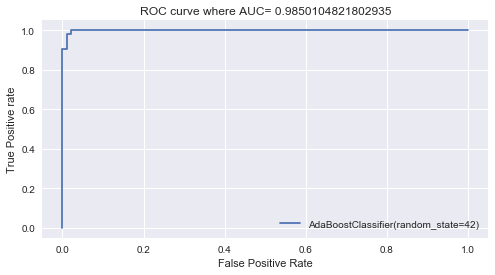

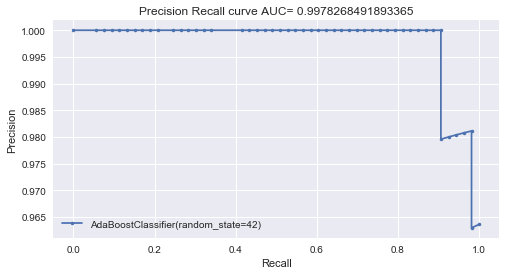

In [14]:
models = [AdaBoostClassifier(random_state = 42)]
roc_pr_cm(models)

## (b) Feature Selection: RandomForest Recursive Feature Elimination

In [15]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### sklearn.feature_selection.RFE

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, criterion='entropy', max_depth=20, max_features='auto')

from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf, n_features_to_select=15, step = 1)

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)

print('-----------------------------------------------------------------------')

print("Selected Features: %s" % fit.support_)

print('-----------------------------------------------------------------------')

print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
-----------------------------------------------------------------------
Selected Features: [ True  True  True  True False False  True  True False False False False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]
-----------------------------------------------------------------------
Feature Ranking: [ 1  1  1  1  7  5  1  1  8 14  4 10  3  1 12 11 13 16  9 15  1  1  1  1
  1  2  1  1  1  6]


In [17]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':rfe.ranking_})

selected_rfe_features.sort_values(by='Ranking')
selected_rfe_features = selected_rfe_features[selected_rfe_features['Ranking'] == 1]
top15 = selected_rfe_features.nlargest(15,'Ranking')
top15

,Feature,Ranking
0,radius_mean,1
1,texture_mean,1
2,perimeter_mean,1
3,area_mean,1
6,concavity_mean,1
7,concave points_mean,1
13,area_se,1
20,radius_worst,1
21,texture_worst,1
22,perimeter_worst,1


In [18]:
top15.Feature.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'], dtype=object)

In [19]:
df = pd.read_csv('preprocessed_breast_cancer.csv', usecols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'diagnosis'])

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
models = [AdaBoostClassifier(random_state = 42)]
model_names=['AdaBoostClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,AdaBoostClassifier,0.955031,0.991879,0.943396,0.943396,1.0,0.943396,0.958042


---------------------------------------------------------------


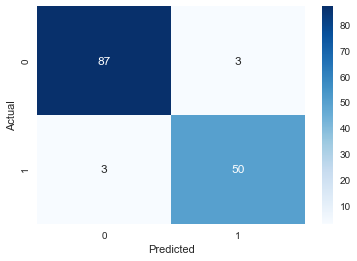

TP: 50, FP: 3, TN: 87, FN: 3
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.967     0.967     0.967        90
           1      0.943     0.943     0.943        53

    accuracy                          0.958       143
   macro avg      0.955     0.955     0.955       143
weighted avg      0.958     0.958     0.958       143

---------------------------------------------------------------
Recall Score: 0.9434
.
Macro Average of Recall Score: 0.955
Weighted Average of Recall Score: 0.958
---------------------------------------------------------------


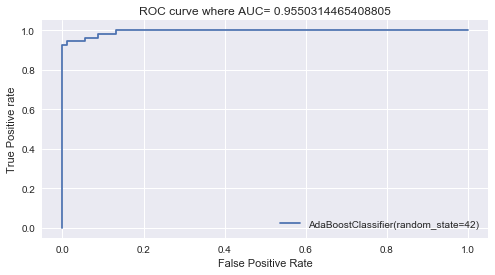

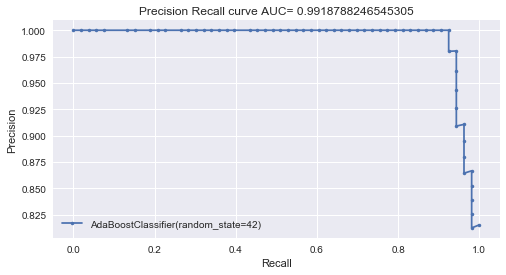

In [21]:
models = [AdaBoostClassifier(random_state = 42)]
roc_pr_cm(models)

## (c) Feature Selection: RandomForest Boruta

In [22]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)
rf.fit(X_train, y_train)

from boruta import BorutaPy
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=146, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1C2D348CD08),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1C2D348CD08, verbose=2)

In [24]:
# check selected features
print("Selected Features: ", boruta_selector.support_)

print ('----------------------------------------------------------------------------')
 
# check ranking of features
print("Ranking: ", boruta_selector.ranking_)

print ('----------------------------------------------------------------------------')

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True False  True False
  True  True False False  True  True False False  True  True  True  True
  True  True  True  True  True  True]
----------------------------------------------------------------------------
Ranking:  [1 1 1 1 1 1 1 1 1 3 1 2 1 1 5 2 1 1 4 2 1 1 1 1 1 1 1 1 1 1]
----------------------------------------------------------------------------
No. of significant features:  24


In [25]:
green_area = X.columns[boruta_selector.support_].to_list()
blue_area = X.columns[boruta_selector.support_weak_].to_list()

print ('features in the green area:', green_area)

print ('============================================================================================================================================================================================================')

print ('features in the blue area:', blue_area)

features in the green area: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
features in the blue area: ['texture_se', 'compactness_se', 'fractal_dimension_se']


In [26]:
# Let's visualise it better in the form of a table
selected_boruta_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_boruta_features.sort_values(by='Ranking')
selected_boruta_features = selected_boruta_features[selected_boruta_features['Ranking'] < 16]
top15 = selected_boruta_features.nsmallest(15,'Ranking')
top15 

,Feature,Ranking
0,radius_mean,1
1,texture_mean,1
2,perimeter_mean,1
3,area_mean,1
4,smoothness_mean,1
5,compactness_mean,1
6,concavity_mean,1
7,concave points_mean,1
8,symmetry_mean,1
10,radius_se,1


In [27]:
top15.Feature.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se',
       'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
       'radius_worst'], dtype=object)

In [28]:
df = pd.read_csv('preprocessed_breast_cancer.csv', usecols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se',
       'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'diagnosis'])

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
models = [AdaBoostClassifier(random_state = 42)]
model_names=['AdaBoostClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,AdaBoostClassifier,0.953354,0.990808,0.962264,0.910714,1.0,0.93578,0.951049


---------------------------------------------------------------


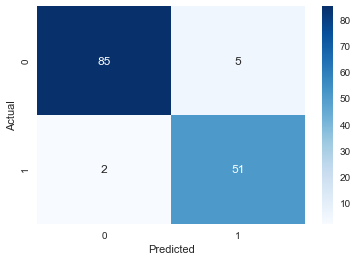

TP: 51, FP: 5, TN: 85, FN: 2
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.977     0.944     0.960        90
           1      0.911     0.962     0.936        53

    accuracy                          0.951       143
   macro avg      0.944     0.953     0.948       143
weighted avg      0.952     0.951     0.951       143

---------------------------------------------------------------
Recall Score: 0.9623
.
Macro Average of Recall Score: 0.9534
Weighted Average of Recall Score: 0.951
---------------------------------------------------------------


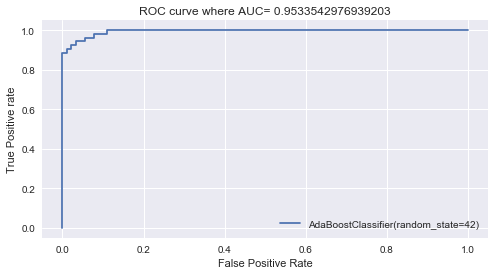

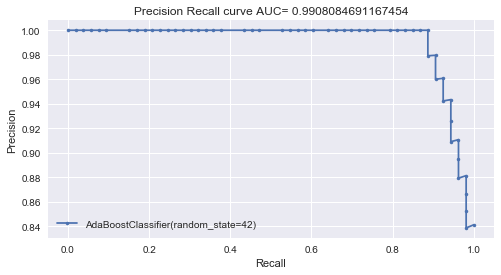

In [30]:
models = [AdaBoostClassifier(random_state = 42)]
roc_pr_cm(models)

## (d) Permutation Feature Importance

In [31]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

Feature: 0, Score: 0.00283
Feature: 1, Score: 0.01321
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00094
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00943
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00377
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00755
Feature: 21, Score: 0.01226
Feature: 22, Score: 0.01226
Feature: 23, Score: 0.01604
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00755
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


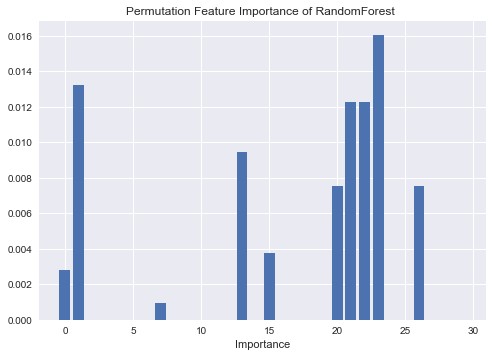

In [32]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='recall')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.xlabel('Importance')
plt.title("Permutation Feature Importance of RandomForest ")
plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')

idx_features = (-importance).argsort()[:15]
name_features = np.array(X_train.columns.to_list())[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['area_worst' 'texture_mean' 'perimeter_worst' 'texture_worst' 'area_se'
 'radius_worst' 'concavity_worst' 'compactness_se' 'radius_mean'
 'concave points_mean' 'concave points_worst' 'compactness_worst'
 'smoothness_worst' 'fractal_dimension_se' 'symmetry_se']


In [34]:
df = pd.read_csv('preprocessed_breast_cancer.csv', usecols = ['area_worst', 'texture_mean', 'texture_worst', 'area_se', 'concavity_worst',
 'perimeter_worst', 'radius_worst', 'compactness_se', 'radius_mean',
 'smoothness_worst', 'concave points_mean', 'concave points_worst',
 'compactness_worst', 'fractal_dimension_se', 'symmetry_se' , 'diagnosis'])

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
models = [AdaBoostClassifier(random_state = 42)]
model_names=['AdaBoostClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,AdaBoostClassifier,0.966143,0.994219,0.943396,0.980392,1.0,0.961538,0.972028


---------------------------------------------------------------


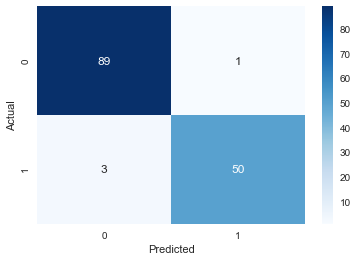

TP: 50, FP: 1, TN: 89, FN: 3
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.967     0.989     0.978        90
           1      0.980     0.943     0.962        53

    accuracy                          0.972       143
   macro avg      0.974     0.966     0.970       143
weighted avg      0.972     0.972     0.972       143

---------------------------------------------------------------
Recall Score: 0.9434
.
Macro Average of Recall Score: 0.9661
Weighted Average of Recall Score: 0.972
---------------------------------------------------------------


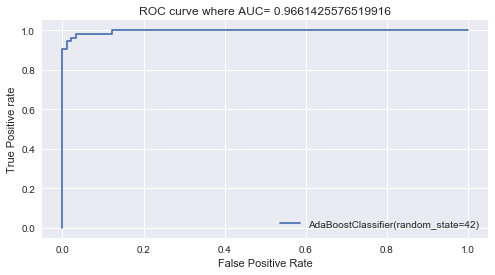

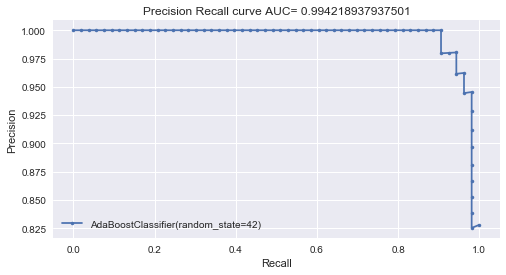

In [36]:
models = [AdaBoostClassifier(random_state = 42)]
roc_pr_cm(models)

## (e) Feature Importance using RandomForestClassifier

In [37]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

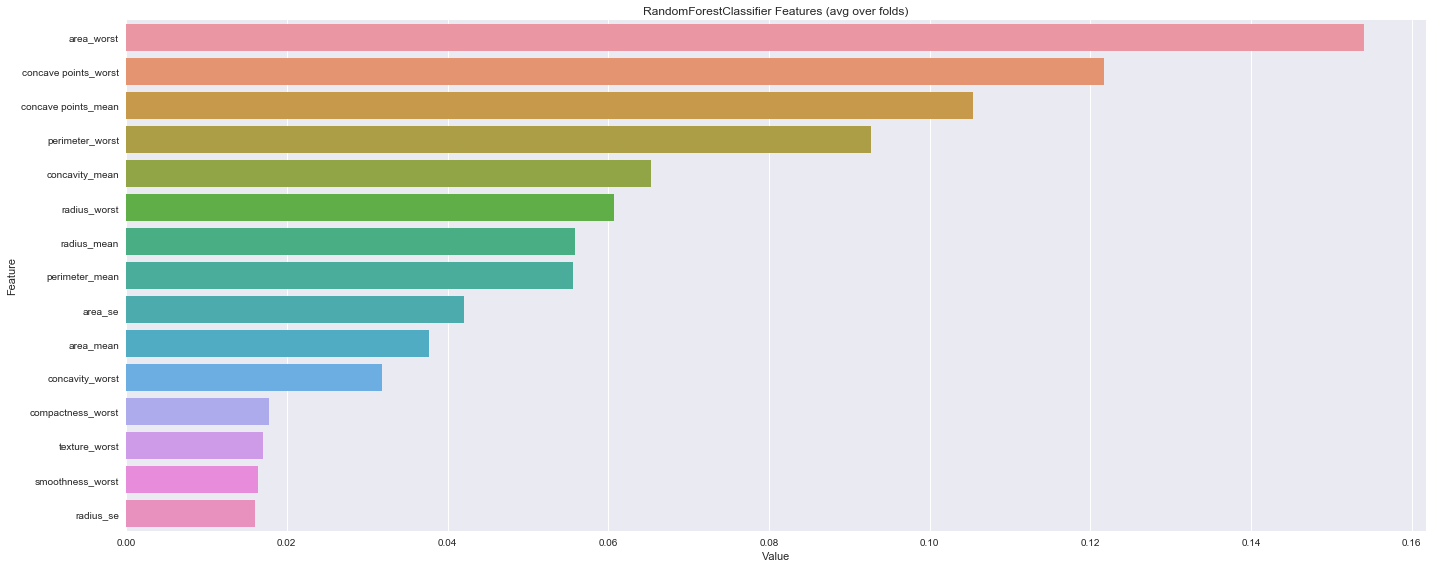

In [38]:
model = RandomForestClassifier(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True), columns=['Value','Feature'])
feature_imp

top15 = feature_imp.nlargest(15,'Value')

plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=top15.sort_values(by="Value", ascending=False))
plt.title('RandomForestClassifier Features (avg over folds)')
plt.tight_layout()
plt.show()

In [39]:
rf_features = top15.Feature.to_list()
rf_features

['area_worst',
 'concave points_worst',
 'concave points_mean',
 'perimeter_worst',
 'concavity_mean',
 'radius_worst',
 'radius_mean',
 'perimeter_mean',
 'area_se',
 'area_mean',
 'concavity_worst',
 'compactness_worst',
 'texture_worst',
 'smoothness_worst',
 'radius_se']

In [40]:
df = pd.read_csv('preprocessed_breast_cancer.csv', usecols = ['area_worst',
 'concave points_worst',
 'concave points_mean',
 'perimeter_worst',
 'concavity_mean',
 'radius_worst',
 'radius_mean',
 'perimeter_mean',
 'area_se',
 'area_mean',
 'concavity_worst',
 'compactness_worst',
 'texture_worst',
 'smoothness_worst',
 'radius_se', 'diagnosis'])

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
models = [AdaBoostClassifier(random_state = 42)]
model_names=['AdaBoostClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,AdaBoostClassifier,0.98501,0.994428,0.981132,0.981132,1.0,0.981132,0.986014


---------------------------------------------------------------


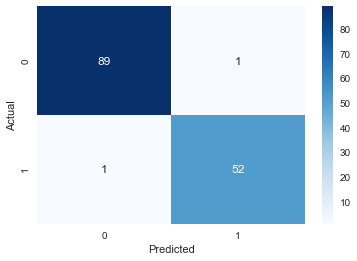

TP: 52, FP: 1, TN: 89, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.989     0.989     0.989        90
           1      0.981     0.981     0.981        53

    accuracy                          0.986       143
   macro avg      0.985     0.985     0.985       143
weighted avg      0.986     0.986     0.986       143

---------------------------------------------------------------
Recall Score: 0.9811
.
Macro Average of Recall Score: 0.985
Weighted Average of Recall Score: 0.986
---------------------------------------------------------------


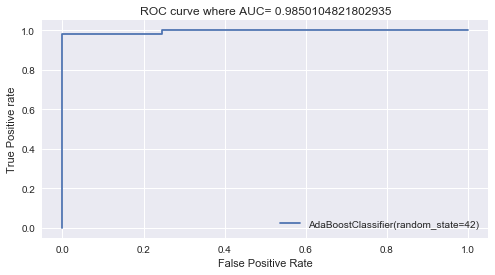

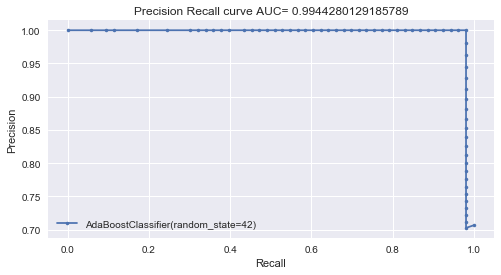

In [42]:
models = [AdaBoostClassifier(random_state = 42)]
roc_pr_cm(models)

## (f) Feature Importance using XGBoostClassifier

In [43]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

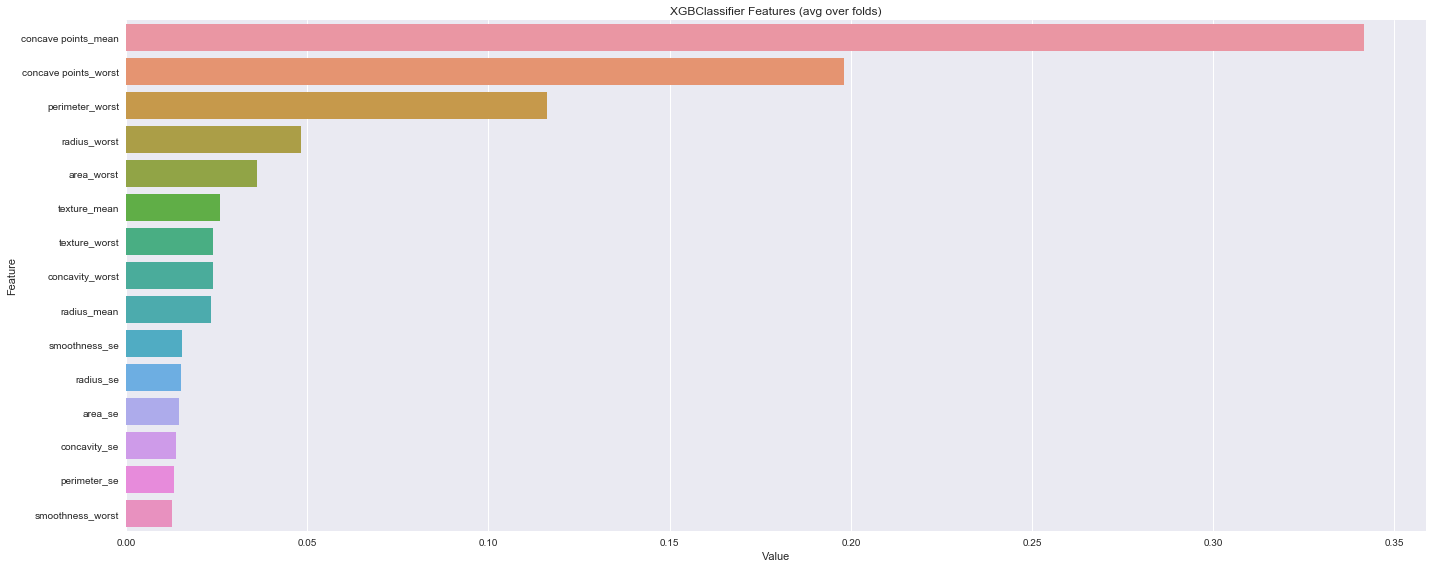

In [44]:
model = XGBClassifier(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True), columns=['Value','Feature'])
feature_imp

top15 = feature_imp.nlargest(15,'Value')

plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=top15.sort_values(by="Value", ascending=False))
plt.title('XGBClassifier Features (avg over folds)')
plt.tight_layout()
plt.show()

In [45]:
xgb_features = top15.Feature.to_list()
xgb_features

['concave points_mean',
 'concave points_worst',
 'perimeter_worst',
 'radius_worst',
 'area_worst',
 'texture_mean',
 'texture_worst',
 'concavity_worst',
 'radius_mean',
 'smoothness_se',
 'radius_se',
 'area_se',
 'concavity_se',
 'perimeter_se',
 'smoothness_worst']

In [46]:
df = pd.read_csv('preprocessed_breast_cancer.csv', usecols = ['concave points_mean',
 'concave points_worst',
 'perimeter_worst',
 'radius_worst',
 'area_worst',
 'texture_mean',
 'texture_worst',
 'concavity_worst',
 'radius_mean',
 'smoothness_se',
 'radius_se',
 'area_se',
 'concavity_se',
 'perimeter_se',
 'smoothness_worst', 'diagnosis'])

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
models = [AdaBoostClassifier(random_state = 42)]
model_names=['AdaBoostClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,AdaBoostClassifier,0.981132,0.999308,0.962264,1.0,1.0,0.980769,0.986014


---------------------------------------------------------------


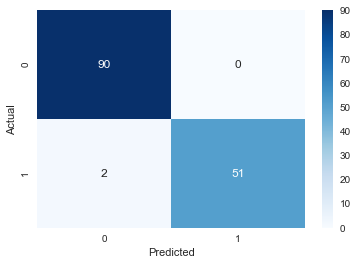

TP: 51, FP: 0, TN: 90, FN: 2
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.978     1.000     0.989        90
           1      1.000     0.962     0.981        53

    accuracy                          0.986       143
   macro avg      0.989     0.981     0.985       143
weighted avg      0.986     0.986     0.986       143

---------------------------------------------------------------
Recall Score: 0.9623
.
Macro Average of Recall Score: 0.9811
Weighted Average of Recall Score: 0.986
---------------------------------------------------------------


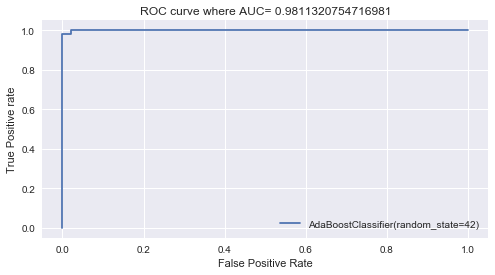

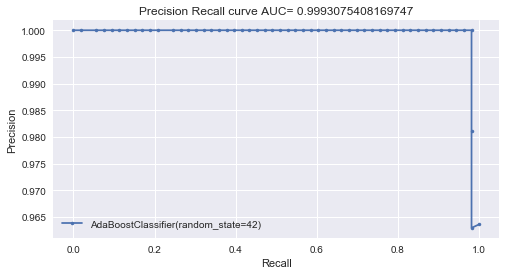

In [48]:
models = [AdaBoostClassifier(random_state = 42)]
roc_pr_cm(models)

## Conclusion

### (a) Feature selection using SelectFromModel and LassoCV
- Recall Score: 0.9811
- Macro Average of Recall Score: 0.985
- Weighted Average of Recall Score: 0.986 

### (b) Feature Selection: RandomForest Recursive Feature Elimination
- Recall Score: 0.9434
- Macro Average of Recall Score: 0.955
- Weighted Average of Recall Score: 0.958

### (c) Feature Selection: RandomForest Boruta
- Recall Score: 0.9623
- Macro Average of Recall Score: 0.9534
- Weighted Average of Recall Score: 0.951

### (d) Permutation Feature Importance
- Recall Score: 0.9434
- Macro Average of Recall Score: 0.9661
- Weighted Average of Recall Score: 0.972

### (e) Feature Importance using RandomForestClassifier
- Recall Score: 0.9811
- Macro Average of Recall Score: 0.985
- Weighted Average of Recall Score: 0.986

### (f) Feature Importance using XGBoostClassifier
- Recall Score: 0.9623
- Macro Average of Recall Score: 0.9811
- Weighted Average of Recall Score: 0.986

### Selected Features: (e) Feature Importance using RandomForestClassifier
['area_worst',
 'concave points_worst',
 'concave points_mean',
 'perimeter_worst',
 'concavity_mean',
 'radius_worst',
 'radius_mean',
 'perimeter_mean',
 'area_se',
 'area_mean',
 'concavity_worst',
 'compactness_worst',
 'texture_worst',
 'smoothness_worst',
 'radius_se', 'diagnosis']